In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [13]:
d = pickle.load(open("frame_level_fa2.pkl", "rb"))
att_ws = np.load("FADG0_SI1909.ep.16.npy")

In [14]:
oracle_att = d["FADG0_SI1909"]

In [15]:
len(oracle_att)

27

In [16]:
len(oracle_att), oracle_att[-1]
oracle_att

[[0, 14],
 [14, 27],
 [27, 43],
 [43, 46],
 [46, 66],
 [66, 87],
 [87, 91],
 [91, 94],
 [94, 103],
 [103, 110],
 [110, 119],
 [119, 130],
 [130, 145],
 [145, 154],
 [154, 157],
 [157, 173],
 [173, 182],
 [182, 188],
 [188, 191],
 [191, 196],
 [196, 201],
 [201, 211],
 [211, 227],
 [227, 230],
 [230, 246],
 [246, 266],
 [266, 276]]

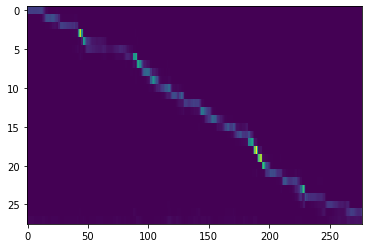

In [17]:
plt.imshow(att_ws, aspect="auto")

In [18]:
att_ws.shape

(28, 277)

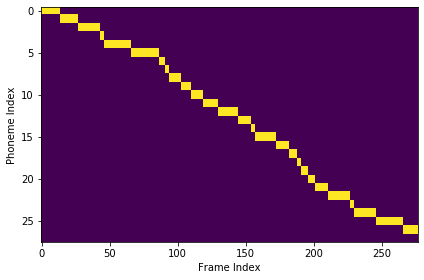

In [24]:
new_atts = np.zeros((28,277))
for i,row in enumerate(oracle_att):
    new_atts[i][row[0]:row[1]] = 1
new_atts[-2][266:]=1

plt.imshow(new_atts, aspect="auto")
plt.xlabel("Frame Index")
plt.ylabel("Phoneme Index")
plt.tight_layout()
plt.savefig("/home/neo/MS/ICASSP_2020/FA/results/images/gt_att.png", dpi=100)

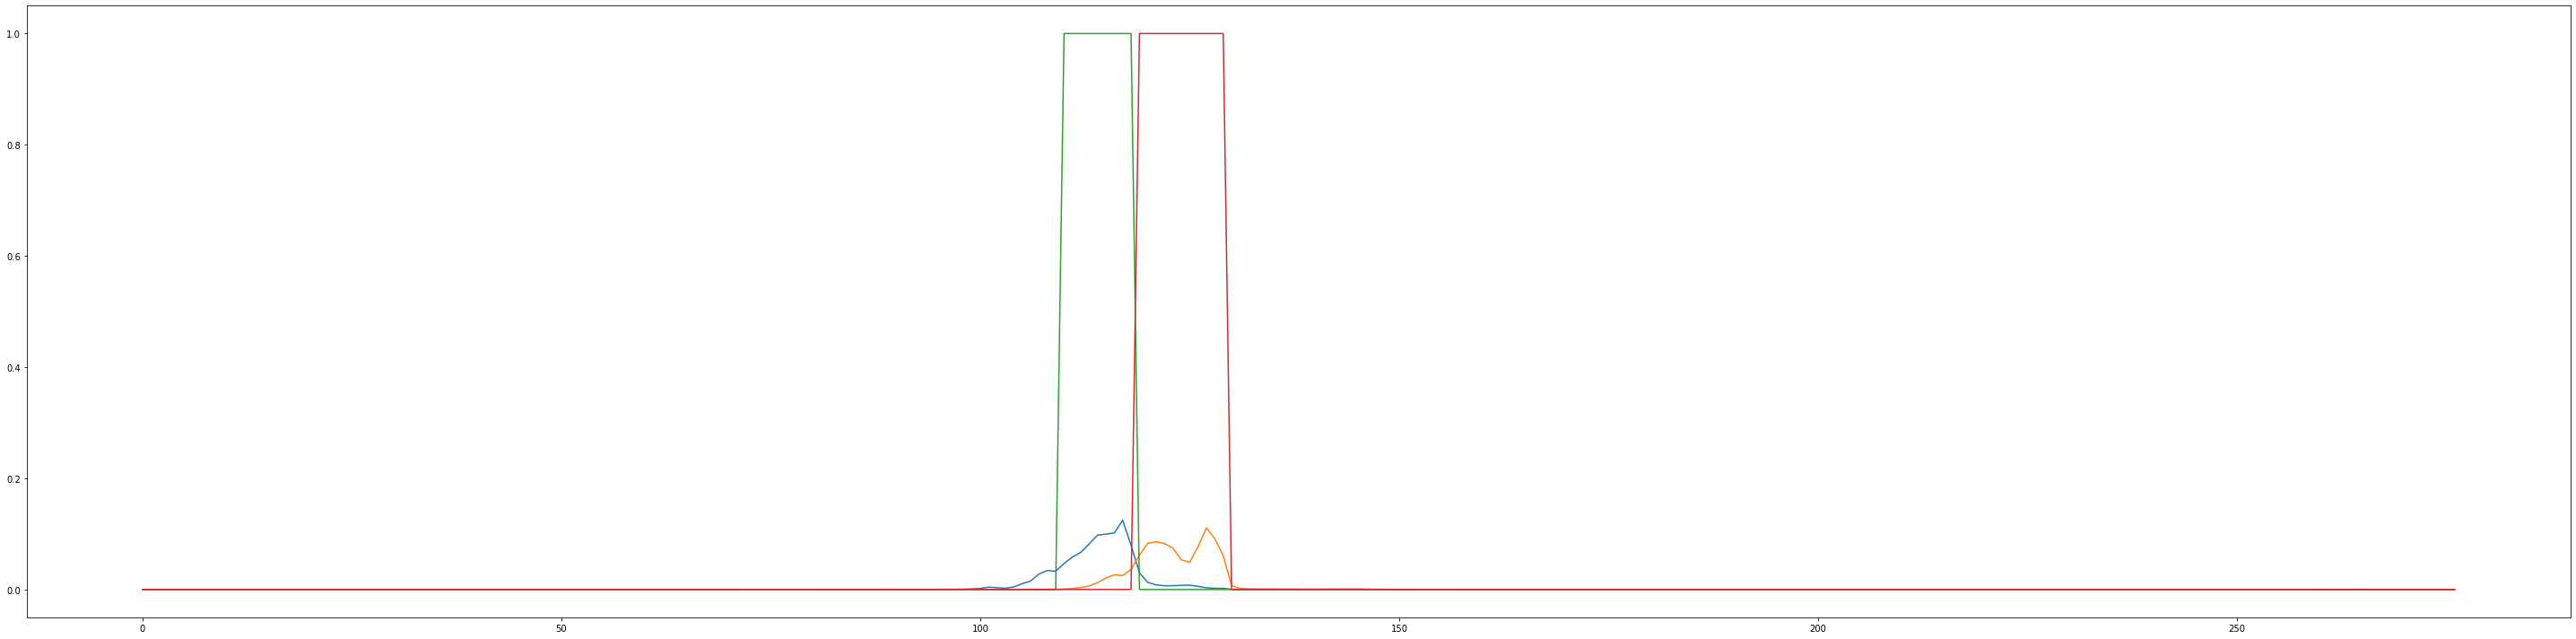

In [56]:
plt.figure(figsize=(40,10))
plt.plot(att_ws[10])
plt.plot(att_ws[11])
plt.plot(new_atts[10])
plt.plot(new_atts[11])
plt.tight_layout()

In [83]:
a = att_ws[10] - att_ws[11]

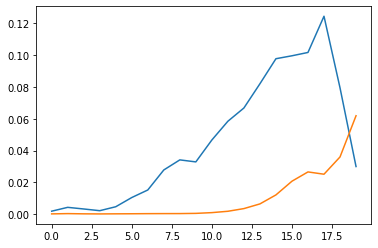

In [93]:
plt.plot(att_ws[10][100:120])
plt.plot(att_ws[11][100:120])

In [102]:
b = np.array(att_ws[10] - att_ws[11]) > 0.04

In [104]:
for i, ele in enumerate(b[:-1]):
    if(ele == True):
        if(b[i+1] == False):
            print(i)

118


In [106]:
att_ws[10][118], att_ws[11][118]

(0.07943947, 0.035955984)

In [131]:
boundaries = []
prev_bound = None
for i in range(len(att_ws) - 1):
    diff = np.array(att_ws[i] - att_ws[i+1]) > 0.04
    for i, ele in enumerate(diff[:-1]):
        if(ele == True):
            if(diff[i+1] == False):
                if(prev_bound == None):
                    prev_bound = 0
                boundaries.append([prev_bound, i])
                prev_bound = i

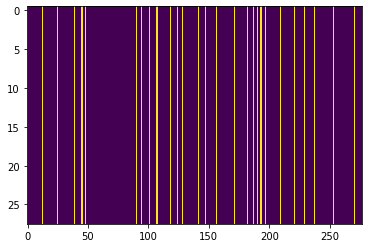

In [133]:
new_atts = np.zeros((28,277))
for ele in boundaries:
    new_atts[:,ele]=1
plt.imshow(new_atts, aspect="auto")

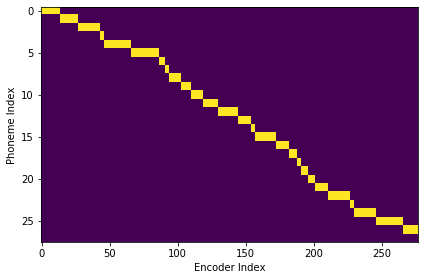

In [144]:
new_atts = np.zeros((28,277))
for i,row in enumerate(oracle_att):
    new_atts[i][row[0]:row[1]] = 1
new_atts[-2][266:]=1

plt.imshow(new_atts, aspect="auto")
plt.xlabel("Encoder Index")
plt.ylabel("Phoneme Index")
plt.tight_layout()
plt.savefig("/home/neo/MS/ICASSP_2020/FA/gt_att.png")

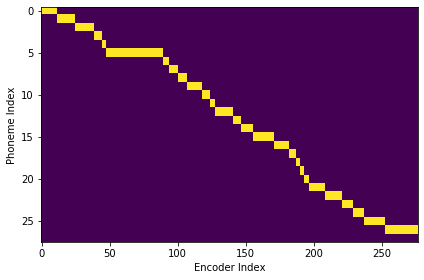

In [143]:
new_atts2 = np.zeros((28,277))
for i,row in enumerate(boundaries):
    new_atts2[i][row[0]:row[1]] = 1
new_atts2[-2][266:]=1

plt.imshow(new_atts, aspect="auto")
plt.imshow(new_atts2, aspect="auto")

plt.xlabel("Encoder Index")
plt.ylabel("Phoneme Index")
plt.tight_layout()
# plt.savefig("/home/neo/MS/ICASSP_2020/FA/gt_att.png")